# Hackathon Sujet 2 : Analyse Des Coûts De L'assurance Médicale

Description :

Dans ce hackathon, vous êtes chargé d'analyser les coûts de l'assurance médicale en fonction de divers facteurs tels que l'âge, le sexe, l'IMC, le nombre de personnes à charge, les habitudes du tabagisme et la région résidentielle. En tant qu'analyste de données travaillant dans le secteur de l'assurance maladie, votre objectif est d'explorer les « ensembles de données personnelles sur les coûts médicaux » pour découvrir des modèles et des idées qui pourraient éclairer les stratégies de tarification, l'évaluation des risques et la planification personnalisée des soins de santé.

Cet ensemble de données vous permet d'étudier les relations entre les facteurs démographiques et de mode de vie et les dépenses médicales, offrant des informations précieuses sur les principaux facteurs des coûts d'assurance.

## Analyse exploratoire des données (EDA) :

### Effectuer une analyse complète de l'ensemble de données pour comprendre la répartition des variables et identifier toute corrélation entre des caractéristiques telles que l'âge, l'IMC, le statut de tabagisme et les frais médicaux (charges).

### Utilisez des statistiques et des visualisations descriptives pour résumer les données et mettre en évidence les tendances ou les valeurs aberrantes intéressantes.

In [3]:
!wget 'https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%208%20-%20Hackathon%20&%20AB%20Testing/W8D1%20-%20Hackathon/Medical%20Cost%20Personal%20Datasets.zip'

--2025-10-23 21:04:09--  https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%208%20-%20Hackathon%20&%20AB%20Testing/W8D1%20-%20Hackathon/Medical%20Cost%20Personal%20Datasets.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/devtlv/Datasets-DA-Bootcamp-2-/refs/heads/main/Week%208%20-%20Hackathon%20%26%20AB%20Testing/W8D1%20-%20Hackathon/Medical%20Cost%20Personal%20Datasets.zip [following]
--2025-10-23 21:04:09--  https://media.githubusercontent.com/media/devtlv/Datasets-DA-Bootcamp-2-/refs/heads/main/Week%208%20-%20Hackathon%20%26%20AB%20Testing/W8D1%20-%20Hackathon/Medical%20Cost%20Personal%20Datasets.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercon

In [4]:
# Renommage du zip, décompression et déplacement du csv à la racine
!mv 'Medical Cost Personal Datasets.zip' Medical_Cost_Personal_Datasets.zip
!unzip Medical_Cost_Personal_Datasets.zip
!mv 'Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv' .

Archive:  Medical_Cost_Personal_Datasets.zip
   creating: Medical Cost Personal Datasets/Medical Cost Personal Datasets/
  inflating: Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv  


In [5]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df2 = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

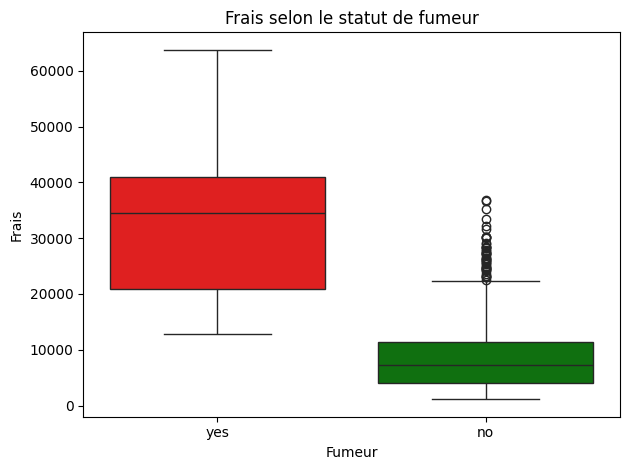

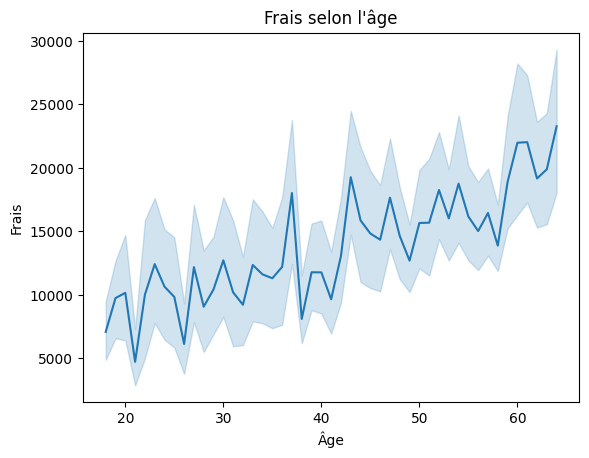

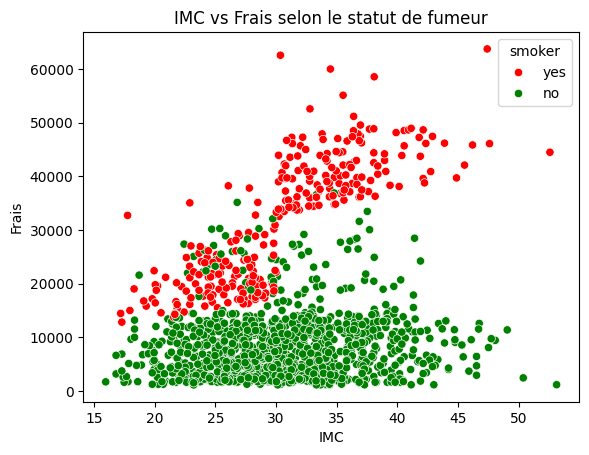

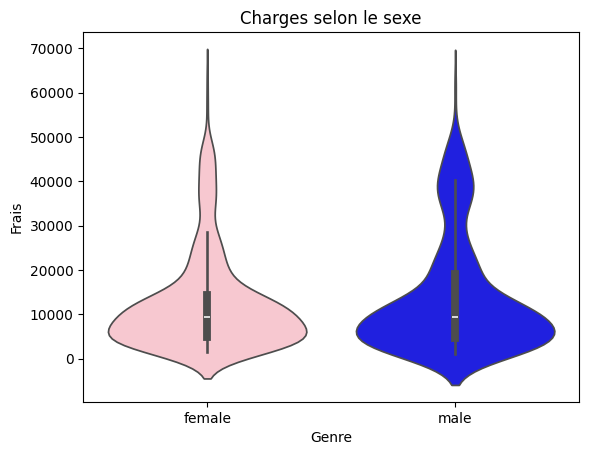

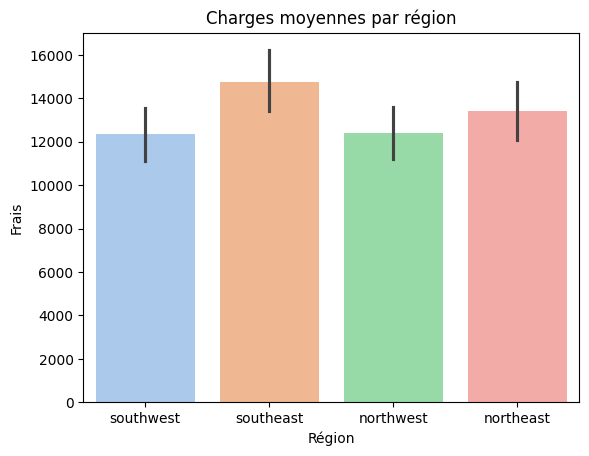

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Frais selon le statut de fumeur
plt.figure()
sns.boxplot(x="smoker", y="charges", data=df, hue="smoker", palette={"yes": "red", "no": "green"})
plt.title("Frais selon le statut de fumeur")
plt.xlabel("Fumeur")
plt.ylabel("Frais")
plt.tight_layout()
plt.show()

# Frais selon l'âge
plt.figure()
sns.lineplot(x="age", y="charges", data=df)
plt.title("Frais selon l'âge")
plt.xlabel("Âge")
plt.ylabel("Frais")
plt.show()

# IMC vs Frais selon le statut de fumeur
plt.figure()
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", palette={"yes": "red", "no": "green"})
plt.title("IMC vs Frais selon le statut de fumeur")
plt.xlabel("IMC")
plt.ylabel("Frais")
plt.show()

# Frais par genre
plt.figure()
sns.violinplot(x="sex", y="charges", data=df, hue="sex", palette={"female": "pink", "male": "blue"})
plt.title("Frais par genre")
plt.xlabel("Genre")
plt.ylabel("Frais")
plt.show()

# Charges moyennes par région
plt.figure()
sns.barplot(x="region", y="charges", hue="region", data=df, estimator='mean',palette='pastel')
plt.title("Charges moyennes par région")
plt.xlabel("Région")
plt.ylabel("Frais")
plt.show()

## Prétraitement des données :

### Gérer les données manquantes et effectuer tout nettoyage de données nécessaire.

In [7]:
# Comptage des valeurs nulles

if df.isnull().sum().sum() > 0:
  print("Il y a des valeurs nulles dans le dataset : procéder au nettoyage si nécessaire")
  df.dropna(inplace=True)
  print("Nettoyage effectué")
else:
  print("Il n'y a pas de valeurs nulles dans le dataset")

Il n'y a pas de valeurs nulles dans le dataset


Aucune valeur nulle dans le dataset => Pas besoin de nettoyage

### Appliquez la normalisation ou la standardisation aux caractéristiques numériques telles que l'âge, l'imc et les frais pour les préparer à l'analyse.

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selection des colonnes numériques
numerical_cols = ['age', 'bmi', 'charges']

# Normalisation en utilisant MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Affichage des colonnes avant / après normalisation
print("Original (5 premières lignes):")
print(df[numerical_cols].head())

print("\nNormalized (5 premières lignes):")
print(df_normalized[numerical_cols].head())

Original (5 premières lignes):
   age     bmi      charges
0   19  27.900  16884.92400
1   18  33.770   1725.55230
2   28  33.000   4449.46200
3   33  22.705  21984.47061
4   32  28.880   3866.85520

Normalized (5 premières lignes):
        age       bmi   charges
0  0.021739  0.321227  0.251611
1  0.000000  0.479150  0.009636
2  0.217391  0.458434  0.053115
3  0.326087  0.181464  0.333010
4  0.304348  0.347592  0.043816


### Encoder des variables catégorielles telles que le sexe, le fumeur et la région pour faciliter une analyse plus approfondie

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding pour le sexe et la colonne "smoker"

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])       # female=0, male=1
df['smoker'] = label_encoder.fit_transform(df['smoker']) # no=0, yes=1
df['region'] = label_encoder.fit_transform(df['region']) # 0=northeast, 1=northwest, 2=southeast, 3=southwest

# Affichage du résultat
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Exploration des caractéristiques :

### Explorez l'impact des différentes caractéristiques sur les coûts médicaux, en vous concentrant sur des variables clés telles que l'IMC, le statut de tabagisme et le nombre de personnes à charge.

In [13]:
# --- Correlation Matrix ---
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


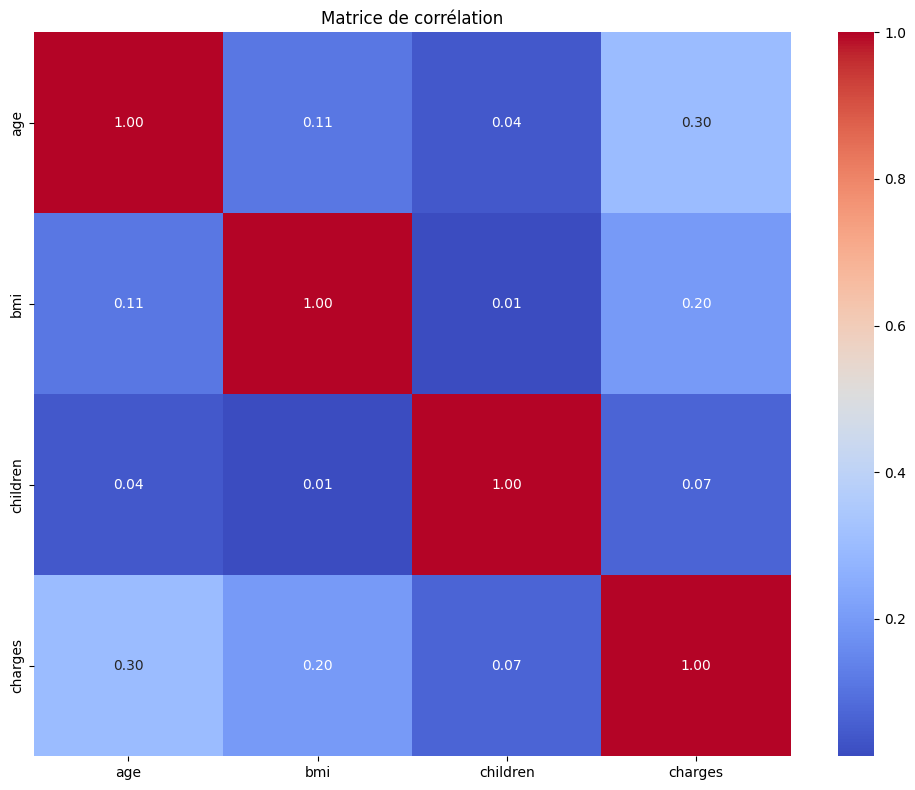

In [14]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

## Visualisation

### Utilisez Matplotlib et Seaborn pour créer des visualisations qui communiquent efficacement vos résultats. Les exemples peuvent inclure des diagrammes de dispersion, des diagrammes de boîtes, des cartes thermiques et des graphiques à barres. Vous pouvez également les créer directement sur Tableau ou PowerBI.

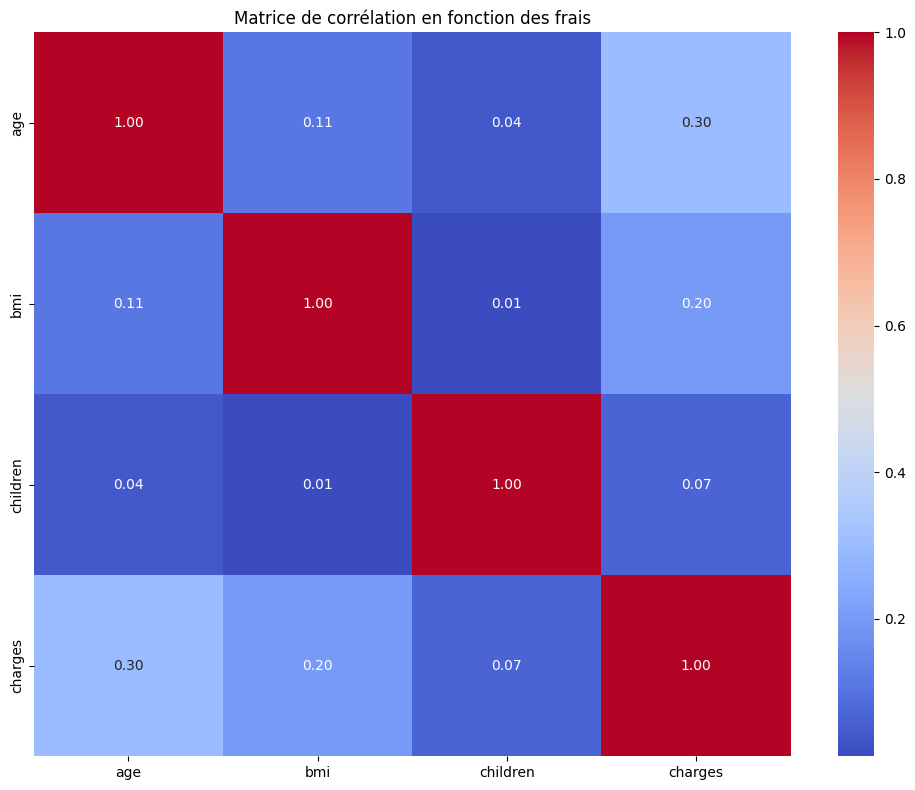

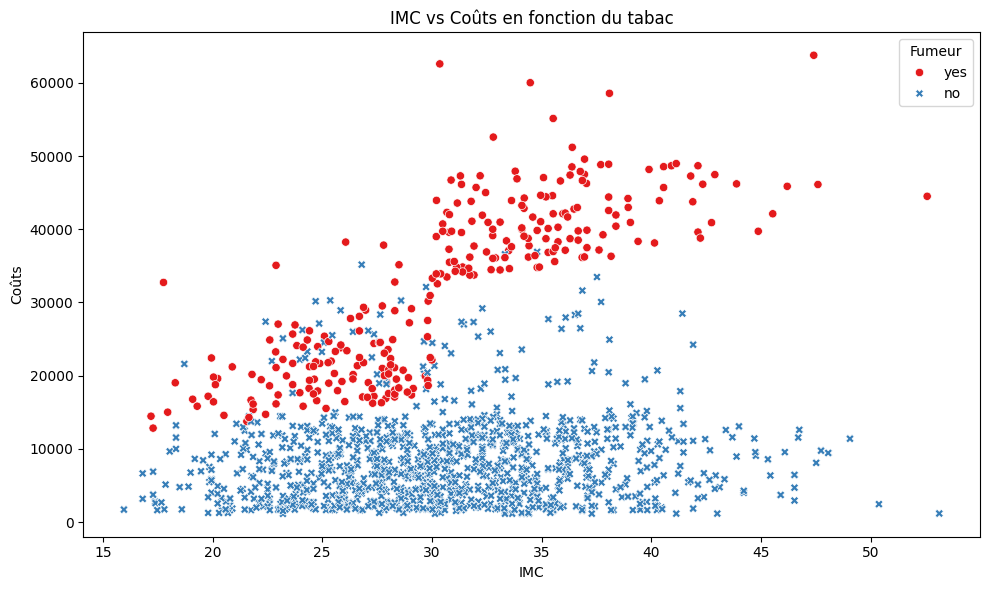

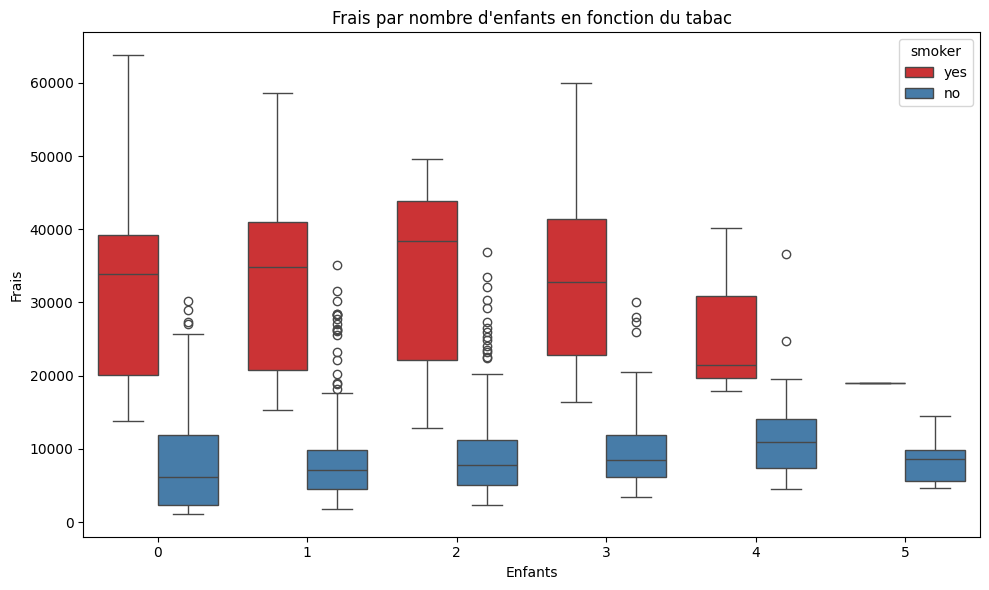

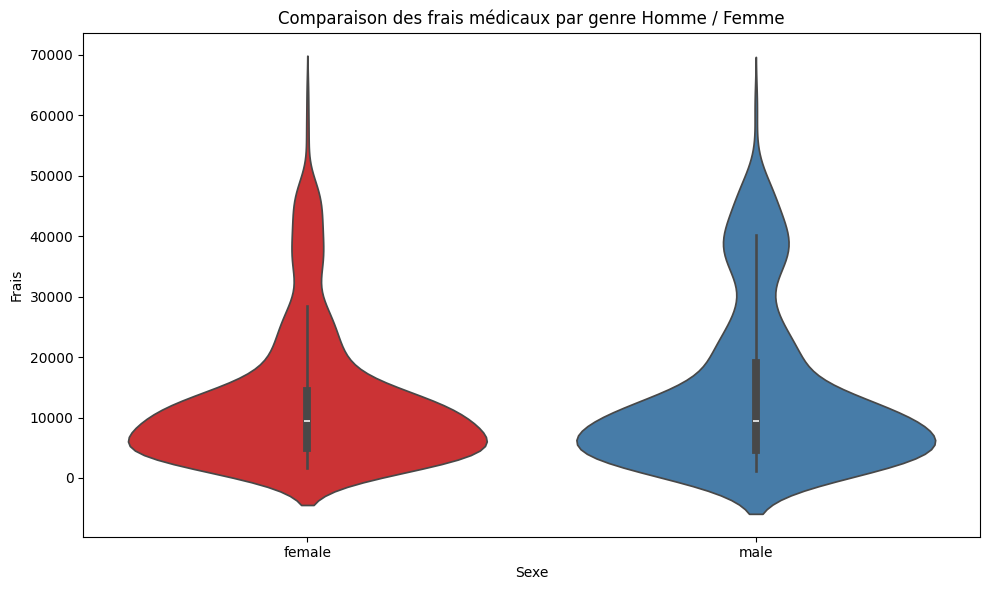

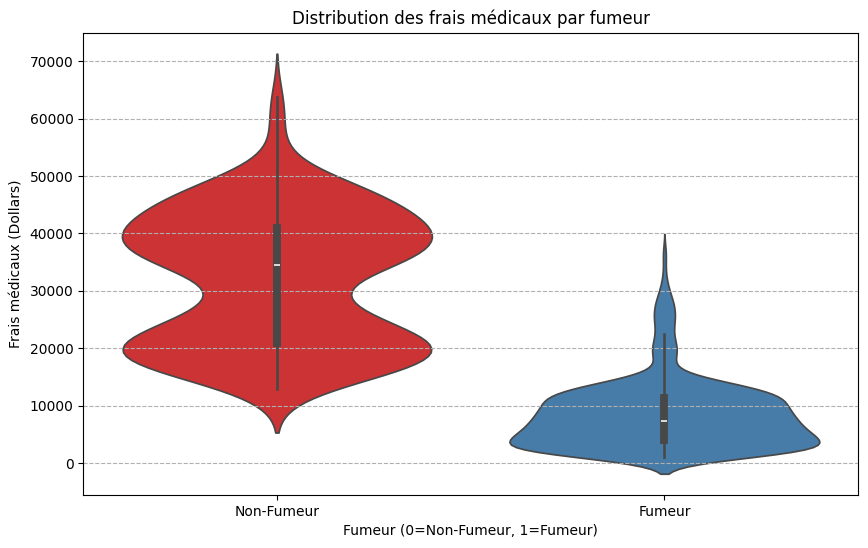


Correlation with Charges:
           charges
charges   1.000000
age       0.299008
bmi       0.198341
children  0.067998


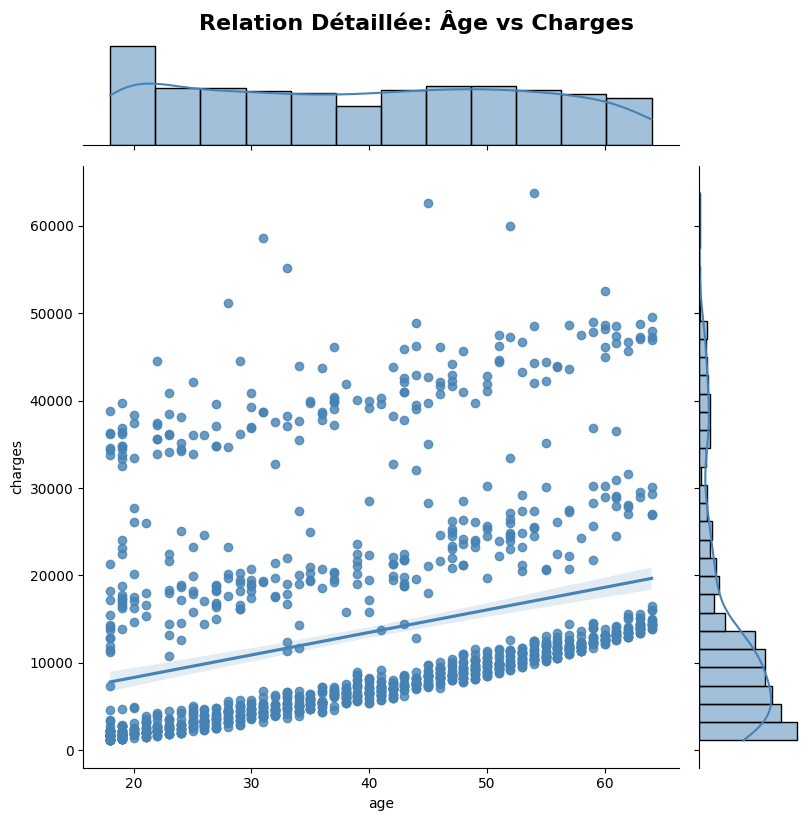

In [16]:
# Matrice de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation en fonction des frais')
plt.tight_layout()
plt.show()

# --- IMC vs Coûts en fonction de la cigarette ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', style='smoker', palette='Set1')
plt.title('IMC vs Coûts en fonction du tabac')
plt.xlabel('IMC')
plt.ylabel('Coûts')
plt.legend(title='Fumeur')
plt.tight_layout()
plt.show()

# --- Frais par nombre d'enfants en fonction du tabac ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='children', y='charges', hue='smoker', palette='Set1')
plt.title("Frais par nombre d'enfants en fonction du tabac")
plt.tight_layout()
plt.xlabel("Enfants")
plt.ylabel("Frais")
plt.show()

# Comparaison des frais médicaux par genre Homme / Femme
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='charges', data=df, hue='sex', palette='Set1')
plt.title('Comparaison des frais médicaux par genre Homme / Femme')
plt.tight_layout()
plt.xlabel("Sexe")
plt.ylabel("Frais")
plt.show()


# Distribution des frais médicaux par fumeur
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df, hue='smoker', palette='Set1')
plt.title('Distribution des frais médicaux par fumeur')
plt.xlabel('Fumeur (0=Non-Fumeur, 1=Fumeur)')
plt.ylabel('Frais médicaux (Dollars)')
plt.xticks([0, 1], ['Non-Fumeur', 'Fumeur'])
plt.grid(axis='y', linestyle='--')
plt.show()

# Jointplot: Âge vs Charges
joint_age = sns.jointplot(data=df, x='age', y='charges', kind='reg',
                          height=8, color='steelblue')
joint_age.fig.suptitle('Relation Détaillée: Âge vs Charges',
                       y=1.02, fontsize=16, fontweight='bold')


# --- Affichage de la correlation frais ---
print("\nCorrelation with Charges:")
print(correlation_matrix[['charges']].sort_values(by='charges', ascending=False))

## Bonus : Analyse régionale :

### Effectuer une analyse détaillée de la façon dont les coûts médicaux varient selon les régions (northeast, southeast, southwest, northwest).

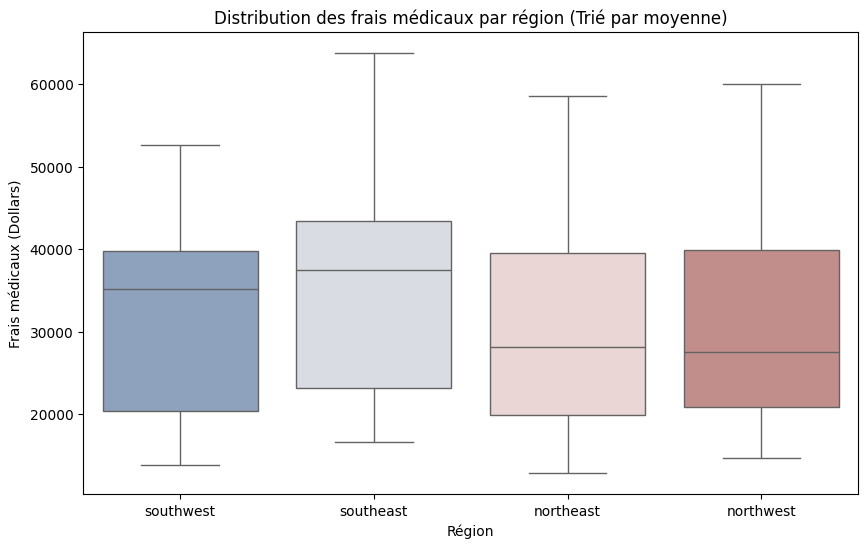

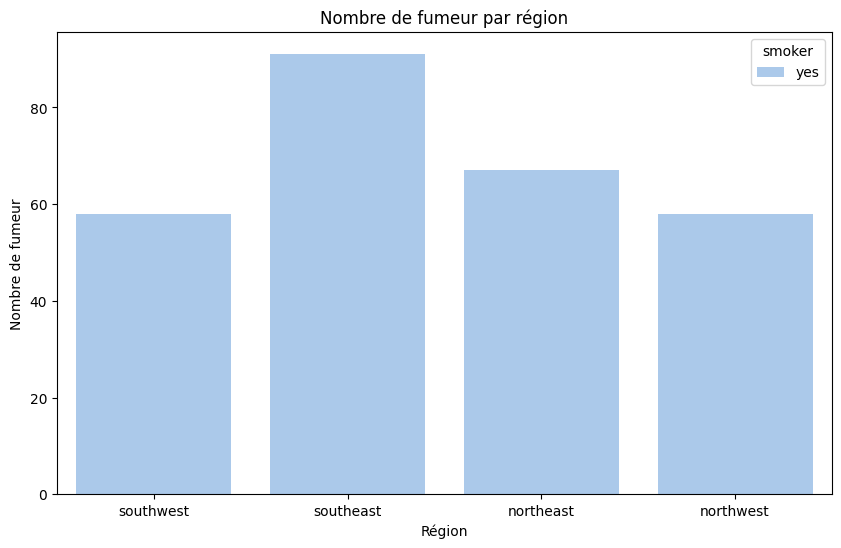

In [77]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des frais médicaux par région (Trié par moyenne)
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df2, hue='region', palette='vlag')
plt.title('Distribution des frais médicaux par région (Trié par moyenne)')
plt.xlabel('Région')
plt.ylabel('Frais médicaux (Dollars)')
plt.show()

region_to_states = {
    'northeast': [
        'CT', 'ME', 'MA', 'NH', 'RI', 'VT',   # New England
        'NJ', 'NY', 'PA', 'DE', 'MD', 'DC'    # Mid-Atlantic
    ],

    'southeast': [
        'VA', 'WV', 'KY', 'NC', 'SC', 'GA', 'FL',
        'TN', 'AL', 'MS', 'AR', 'LA'           # Southern & Gulf
    ],

    'northwest': [
        'WA', 'OR', 'ID', 'MT', 'WY',          # Pacific NW + Rockies
        'ND', 'SD', 'NE', 'MN', 'IA', 'AK'           # Upper Midwest / Plains
    ],

    'southwest': [
        'CA', 'NV', 'UT', 'CO', 'AZ', 'NM',    # Mountain + Desert Southwest
        'TX', 'OK', 'KS', 'MO', 'IL', 'IN', 'OH', 'MI', 'WI',  # Central & Great Lakes
         'HI'                             # Non-contiguous
    ]
}

region_avg = df2.groupby('region', as_index=False)['charges'].mean()
region_avg['state_code'] = region_avg['region'].map(region_to_states)
region_expanded = region_avg.explode('state_code')
import plotly.express as px

fig = px.choropleth(
    region_expanded,
    locations='state_code',
    locationmode='USA-states',
    color='charges',
    hover_name='region',
    scope='usa',
    color_continuous_scale='deep'
)

fig.update_layout(title='Frais médicaux moyens par région')
fig.show()

# Reprise du dataset d'origine (pour éviter les régions à 0,1,2,3)
df2 = df2[df2['smoker'] == 'yes']

# Fumeurs par région
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df2, palette='pastel')
plt.title('Nombre de fumeur par région')
plt.xlabel('Région')
plt.ylabel('Nombre de fumeur')
plt.show()

### Identifiez les tendances régionales en matière de frais médicaux et suggérez les raisons de ces variations.

Nous constatons que les frais médicaux sont plus élevés dans la région southwest (Cf graphe frais médicaux par région)
Ceci s'explique par un nombre important de fumeurs dans cette region par rapport aux autres régions (Cf graphe nombre fumeurs par régions).